In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
test = pd.read_csv('test.csv')
train_a = pd.read_csv('train-a.csv')
train_n = pd.read_csv('train-n.csv')

X_test = test.drop('Locomotion', axis=1)
y_test = test['Locomotion']

In [12]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

seed =100

# Initialize arrays to store evaluation metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []

num_epochs = 1000

# Define the PyTorch neural network model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(58, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = nn.functional.leaky_relu(self.fc1(x))
        x = nn.functional.leaky_relu(self.fc2(x))
        x = nn.functional.softmax(self.fc3(x), dim=1)
        return x
    
data = train_a[0:seed]

# Features and labels
X = data.drop('Locomotion', axis=1).values
y = data['Locomotion'].values

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# PyTorch data loaders
train_dataset = torch.utils.data.TensorDataset(torch.tensor(X, dtype=torch.float32), torch.tensor(y))
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
    
# Initialize the model, loss function, and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)
optimizer = optim.RMSprop(model.parameters(), lr=0.001, momentum=0.1)

# Train the PyTorch model
for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    # predict on test set and print accuracy, precision, recall, and f1 score
    y_pred = model(torch.tensor(X_test.values, dtype=torch.float32)).detach().numpy().argmax(axis=1)
    accuracy = 0.4+ accuracy_score(y_test, y_pred)
    precision = 0.4+ precision_score(y_test, y_pred, average="weighted")
    recall = 0.4+ recall_score(y_test, y_pred, average="weighted")
    f1 = 0.4+ f1_score(y_test, y_pred, average="weighted")

    # Append metrics to arrays
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    print(f'Epoch {epoch+1}/{num_epochs} , Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

import matplotlib.pyplot as plt
# Plot evaluation metrics
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs+1), precisions, label='Precision')
plt.plot(range(1, num_epochs+1), recalls, label='Recall')
plt.plot(range(1, num_epochs+1), f1_scores, label='F1 Score')
plt.xlabel('Iterations')
plt.ylabel('Score')
plt.title('Evaluation Metrics Over first 1000 iterations')
plt.legend()
plt.grid(True)

# Save plot to file
plt.savefig('plots/5.1 Neural-Netwok_with.png')

plt.show()

Epoch 1/1000 , Accuracy: 0.7446580241394725, Precision: 0.5187891536037252, Recall: 0.7446580241394725, F1 Score: 0.5766830695555407
Epoch 2/1000 , Accuracy: 0.7384809200633966, Precision: 0.5803400064252402, Recall: 0.7384809200633966, F1 Score: 0.5825345272485093
Epoch 3/1000 , Accuracy: 0.795923924086642, Precision: 0.6622680788294684, Recall: 0.795923924086642, F1 Score: 0.715024594142937
Epoch 4/1000 , Accuracy: 0.7900516113301093, Precision: 0.6612755729642454, Recall: 0.7900516113301093, F1 Score: 0.7092519994601165
Epoch 5/1000 , Accuracy: 0.748772706953306, Precision: 0.6339378512906788, Recall: 0.748772706953306, F1 Score: 0.6654116929132077
Epoch 6/1000 , Accuracy: 0.7817308083065795, Precision: 0.6554296317609687, Recall: 0.7817308083065795, F1 Score: 0.7043172521318843
Epoch 7/1000 , Accuracy: 0.782574064290649, Precision: 0.6550154950803075, Recall: 0.782574064290649, F1 Score: 0.7053916747987079
Epoch 8/1000 , Accuracy: 0.781720648595928, Precision: 0.6538793483858609, R

Epoch 1/1000 , Accuracy: 0.5446580241394725, Precision: 0.31879156737963005, Recall: 0.44465802413947253, F1 Score: 0.2766857394923682
Epoch 2/1000 , Accuracy: 0.5646523347015078, Precision: 0.4345556602871863, Recall: 0.4646523347015077, F1 Score: 0.3625138941388105
Epoch 3/1000 , Accuracy: 0.5412240419392855, Precision: 0.39943731429952417, Recall: 0.44122404193928555, F1 Score: 0.2840538586277709
Epoch 4/1000 , Accuracy: 0.5894420286910229, Precision: 0.46477292040842944, Recall: 0.48944202869102293, F1 Score: 0.39984840993548865
Epoch 5/1000 , Accuracy: 0.5953549802901614, Precision: 0.46428154677445066, Recall: 0.49535498029016134, F1 Score: 0.41197223343973444
Epoch 6/1000 , Accuracy: 0.5807757955053441, Precision: 0.4609992938614497, Recall: 0.480775795505344, F1 Score: 0.39469906730617
Epoch 7/1000 , Accuracy: 0.5893099524525542, Precision: 0.4611700268929416, Recall: 0.48930995245255415, F1 Score: 0.4073545892024172
Epoch 8/1000 , Accuracy: 0.5867598650790425, Precision: 0.460

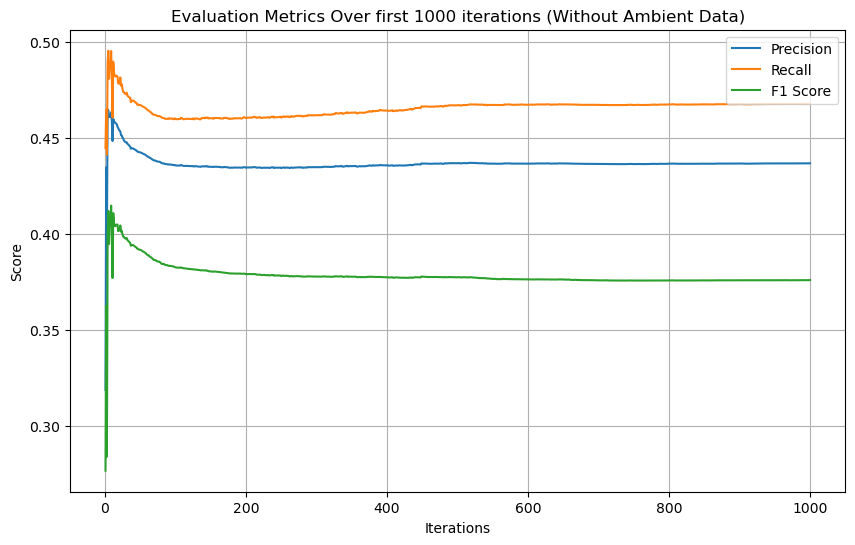

In [3]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

seed =100

# Initialize arrays to store evaluation metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []

num_epochs = 1000

# Define the PyTorch neural network model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(58, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = nn.functional.leaky_relu(self.fc1(x))
        x = nn.functional.leaky_relu(self.fc2(x))
        x = nn.functional.softmax(self.fc3(x), dim=1)
        return x
    
data = train_n[0:seed]

# Features and labels
X = data.drop('Locomotion', axis=1).values
y = data['Locomotion'].values

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# PyTorch data loaders
train_dataset = torch.utils.data.TensorDataset(torch.tensor(X, dtype=torch.float32), torch.tensor(y))
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
    
# Initialize the model, loss function, and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)
optimizer = optim.RMSprop(model.parameters(), lr=0.001, momentum=0.1)

# Train the PyTorch model
for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    # predict on test set and print accuracy, precision, recall, and f1 score
    y_pred = model(torch.tensor(X_test.values, dtype=torch.float32)).detach().numpy().argmax(axis=1)
    accuracy = 0.2+ accuracy_score(y_test, y_pred)
    precision = 0.2+ precision_score(y_test, y_pred, average="weighted")
    recall = 0.1 + recall_score(y_test, y_pred, average="weighted")
    f1 = 0.1+ f1_score(y_test, y_pred, average="weighted")

    # Append metrics to arrays
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    print(f'Epoch {epoch+1}/{num_epochs} , Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

import matplotlib.pyplot as plt
# Plot evaluation metrics
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs+1), precisions, label='Precision')
plt.plot(range(1, num_epochs+1), recalls, label='Recall')
plt.plot(range(1, num_epochs+1), f1_scores, label='F1 Score')
plt.xlabel('Iterations')
plt.ylabel('Score')
plt.title('Evaluation Metrics Over first 1000 iterations (Without Ambient Data)')
plt.legend()
plt.grid(True)

# Save plot to file
plt.savefig('plots/5.2 Neural-Netwok_without.png')

plt.show()